In [18]:
import sys, os
import pandas as pd


# importação dos dados
resultados_exames = pd.read_csv('../data/alura_cure.csv')
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [25]:
# segregação dos dados
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import random

SEED = 123143 # para uso do random no train_test_split
random.seed(SEED)
valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnosticos = resultados_exames.diagnostico

valores_exames_v1 = valores_exames.drop(columns=['exame_33'])

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnosticos, test_size=0.3)
classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)

print("Resultado da classificação % 2f%%" %(classificador.score(teste_x, teste_y) * 100))

In [27]:
# verificar dados vazio
# valores_exames.isnull().sum()


In [30]:
from sklearn.dummy import DummyClassifier
from numpy import random

SEED = 123143
random.seed(SEED)
classificador_bobo = DummyClassifier(strategy="most_frequent")
classificador_bobo.fit(treino_x, treino_y)
print("Resultado da classificação bobo % 2f%%" %(classificador_bobo.score(teste_x, teste_y) * 100))


Resultado da classificação bobo  66.666667%


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)

valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data=valores_exames_v2, columns=valores_exames_v1.keys())


In [41]:
def grafico_violino(valores, inicio, fim):
  dados_plot = pd.concat([diagnosticos, valores.iloc[:, inicio:fim]], axis=1)
  dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores")

  plt.figure(figsize=(10,10))
  sns.violinplot(x="exames", y="valores", hue="diagnostico", data=dados_plot, split=True)
  plt.xticks(rotation=90)

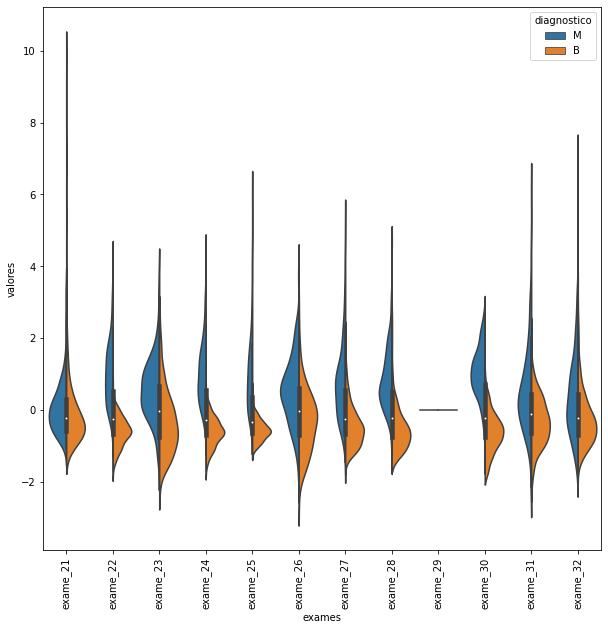

In [47]:
grafico_violino(valores_exames_v2, 20, 32)

In [50]:
valores_exames_v3 = valores_exames_v2.drop(columns=["exame_29", "exame_4"])

def classificar(valores):
  SEED = 1234
  random.seed(SEED)
  treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnosticos, test_size=0.3)
  classificador = RandomForestClassifier(n_estimators=100)
  classificador.fit(treino_x, treino_y)

  print("Resultado da classificação % 2f%%" %(classificador.score(teste_x, teste_y) * 100))


classificar(valores_exames_v3)

Resultado da classificação  92.982456%
